## Problem Statement:

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

## Goals:

1. To build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.

2. To adjust to if the company's requirement changes in the future so you will need to handle these as well.

### Step 1:  Importing libraries and Understanding data

In [1]:
# Importing libraries:

import warnings
warnings.filterwarnings('ignore')

import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Reading data
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads.shape

(9240, 37)

In [4]:
leads.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Step 2:  Data Cleaning and Preparation;

#### Data cleaning

In [6]:
# Checking for missing values:

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
# Percentage of missing values

100*leads.isnull().sum()/len(leads)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

Dropping those fields which have high number of missing values (>35 % ) and are of less importance for analysis i.e. Country and City

In [8]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [9]:
leads.drop(['Tags', 'Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'City' , 'Country'] , axis=1, inplace = True)

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,Potential Lead,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,Select,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,Select,No,No,Modified


In [10]:
leads.shape

(9240, 29)

In [11]:
# Check for columns with select level
l=[]
val=['select','Select']
for feature in leads:
    if (leads[feature].values.any() in val):
        l.append(feature)
print(l)

['Specialization', 'How did you hear about X Education', 'Lead Profile']


In [12]:
for i in l:
    print(leads[i].value_counts())
    print("***************************************************")

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64
***************************************************
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool    

For the columns "How did you hear about X Education" and "Lead Profile", the number of records for select values is more, hence it is better to drop these columns.

In [13]:
leads.drop(["How did you hear about X Education","Lead Profile"],axis = 1, inplace=True)

In [14]:
100*leads.isnull().sum()/len(leads)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   15.562771
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

Specialization has 15.5 % of missing values, since this column is necessary for our analysis, we replace these missing values as 'Others'

In [15]:
for i in leads.columns:
    print(leads[i].value_counts())
    print("***************************************************")

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64
***************************************************
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
***************************************************
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
******************

In [16]:
## Dropping columns which plays no role for our analysis since most of the data points have only one value
leads.drop(["Do Not Call","Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement",
           "Through Recommendations", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content",
           "I agree to pay the amount through cheque",'A free copy of Mastering The Interview'], axis=1, inplace=True)

In [17]:
# Dropping the column "What matters most to you in choosing a course"

leads.drop(["What matters most to you in choosing a course"], axis=1, inplace=True)

In [18]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'Last Notable Activity'],
      dtype='object')

In [19]:
leads.isnull().sum()

Prospect ID                           0
Lead Number                           0
Lead Origin                           0
Lead Source                          36
Do Not Email                          0
Converted                             0
TotalVisits                         137
Total Time Spent on Website           0
Page Views Per Visit                137
Last Activity                       103
Specialization                     1438
What is your current occupation    2690
Last Notable Activity                 0
dtype: int64

Since "What is your current occupation" has huge number of null values, we drop those rows with null values, as it is an importantn determinant

In [20]:
#Removing the rows with null values
leads = leads[~leads["What is your current occupation"].isnull()]

In [21]:
leads.isnull().sum()

Prospect ID                          0
Lead Number                          0
Lead Origin                          0
Lead Source                         36
Do Not Email                         0
Converted                            0
TotalVisits                        130
Total Time Spent on Website          0
Page Views Per Visit               130
Last Activity                      103
Specialization                      18
What is your current occupation      0
Last Notable Activity                0
dtype: int64

In [22]:
leads = leads[~leads["TotalVisits"].isnull()]

In [23]:
leads.isnull().sum()

Prospect ID                         0
Lead Number                         0
Lead Origin                         0
Lead Source                        29
Do Not Email                        0
Converted                           0
TotalVisits                         0
Total Time Spent on Website         0
Page Views Per Visit                0
Last Activity                       0
Specialization                     18
What is your current occupation     0
Last Notable Activity               0
dtype: int64

In [24]:
leads = leads[~leads["Lead Source"].isnull()]

In [25]:
leads.isnull().sum()

Prospect ID                         0
Lead Number                         0
Lead Origin                         0
Lead Source                         0
Do Not Email                        0
Converted                           0
TotalVisits                         0
Total Time Spent on Website         0
Page Views Per Visit                0
Last Activity                       0
Specialization                     18
What is your current occupation     0
Last Notable Activity               0
dtype: int64

In [26]:
leads = leads[~leads["Specialization"].isnull()]

In [27]:
leads.isnull().sum()

Prospect ID                        0
Lead Number                        0
Lead Origin                        0
Lead Source                        0
Do Not Email                       0
Converted                          0
TotalVisits                        0
Total Time Spent on Website        0
Page Views Per Visit               0
Last Activity                      0
Specialization                     0
What is your current occupation    0
Last Notable Activity              0
dtype: int64

#### Data visualization

In [28]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Modified


In [29]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'Last Notable Activity'],
      dtype='object')

#### EDA

1. Univariative Analysis

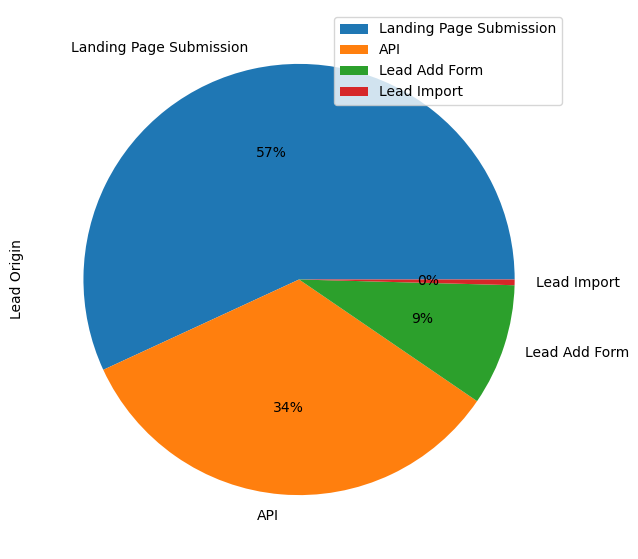

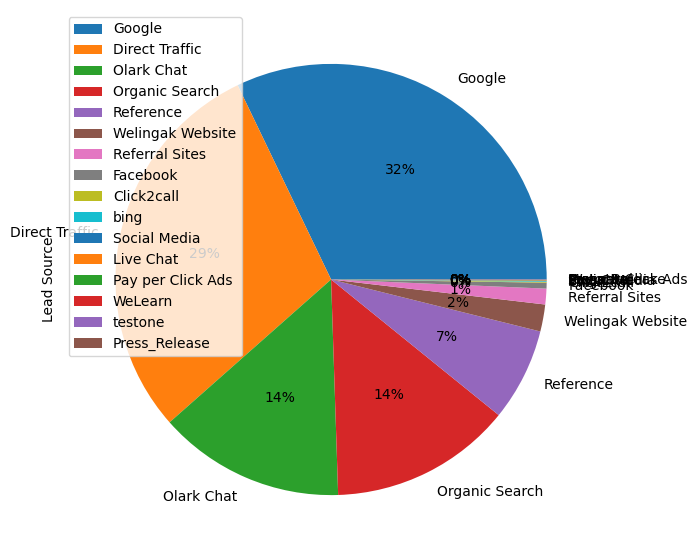

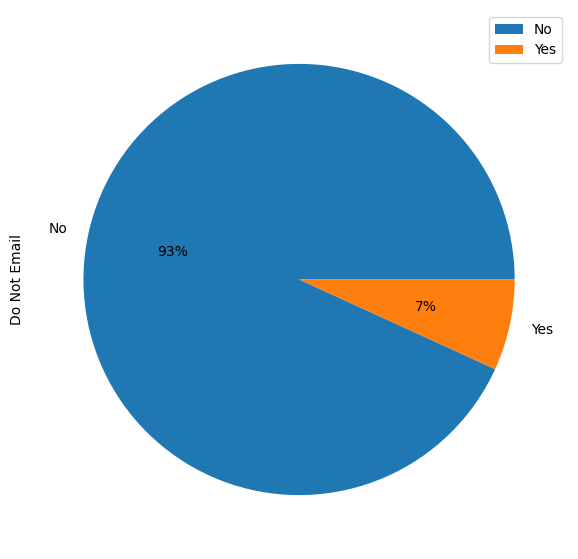

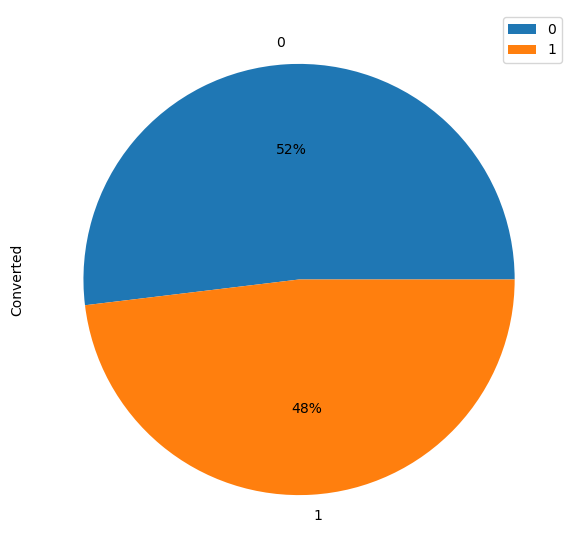

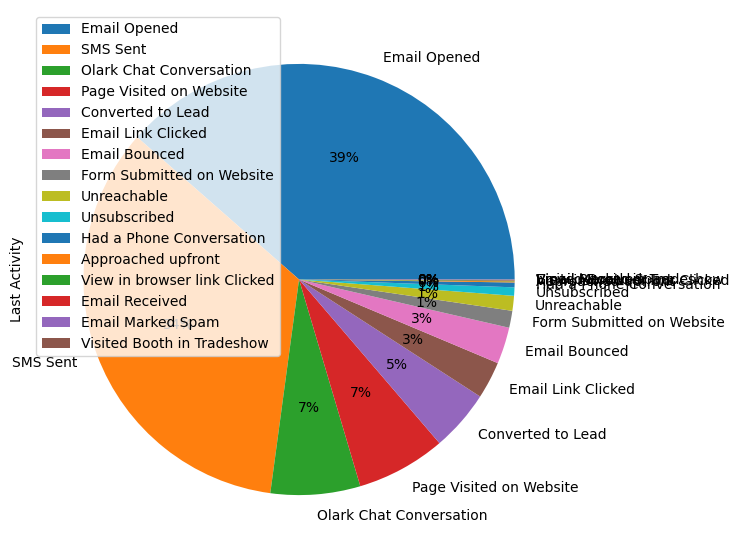

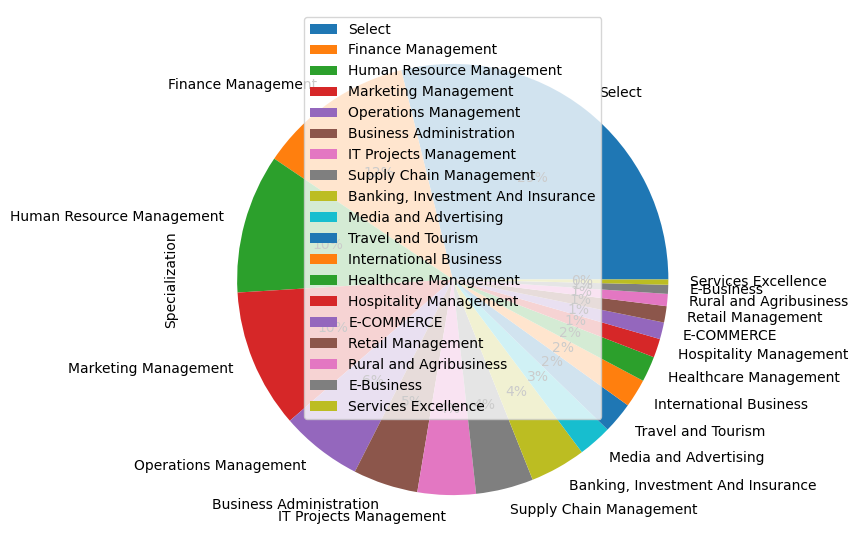

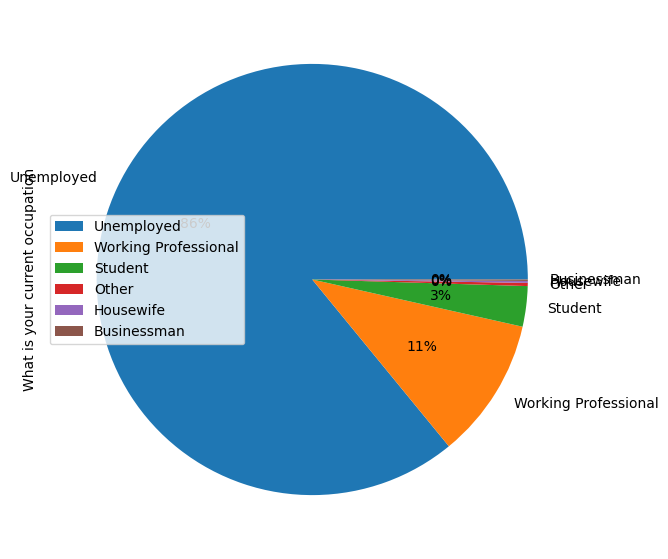

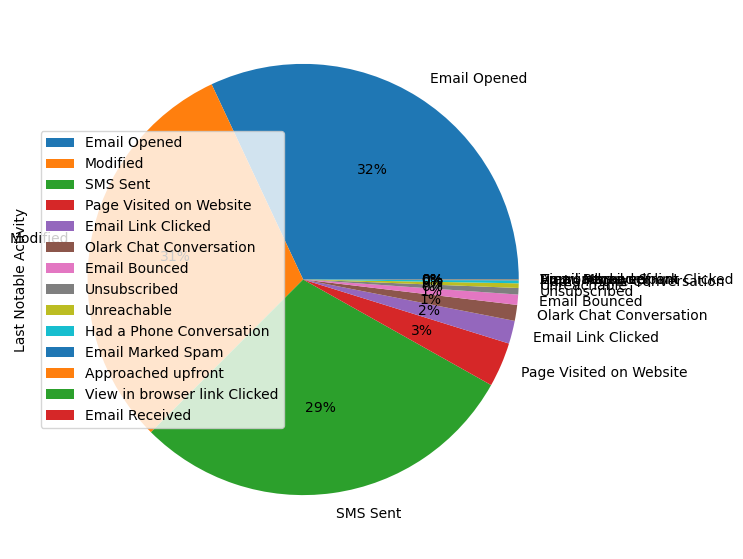

In [30]:
#Representing using pie chart
data=[ 'Lead Origin', 'Lead Source','Do Not Email','Converted', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Last Notable Activity']
for i in data:
        leads[i].value_counts(normalize=True).plot.pie(figsize=(7,7),autopct='%1.0f%%')
        plt.legend()
        plt.show()

1. Land Page Submission and API are the main aspects which determined the customers to be a lead.
2. Google and Direct Traffic are the main lead sources.
3. Last Activity of most of the customers constitutes Email ansd SMS Sent.
4. Most of the customers are unemployed and 11% are working professionals.
5. 93% of customers does not want to be emailed about the course.

#### Bivariative Analysis

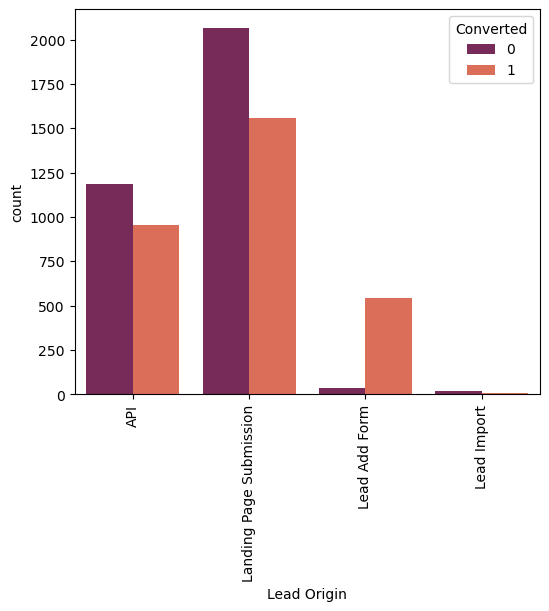

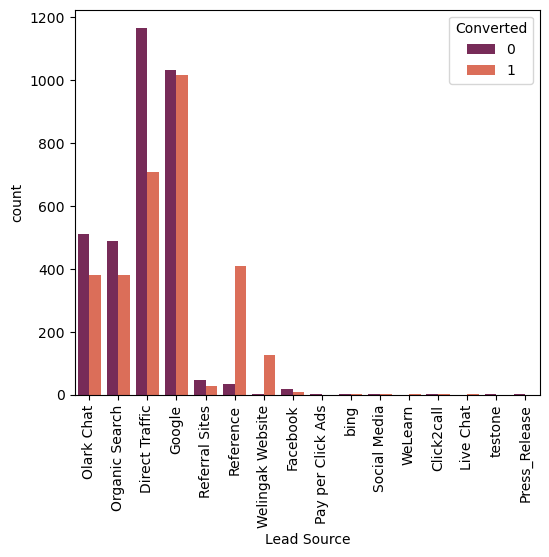

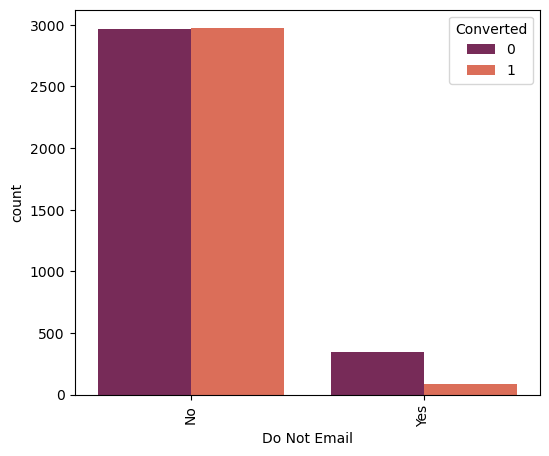

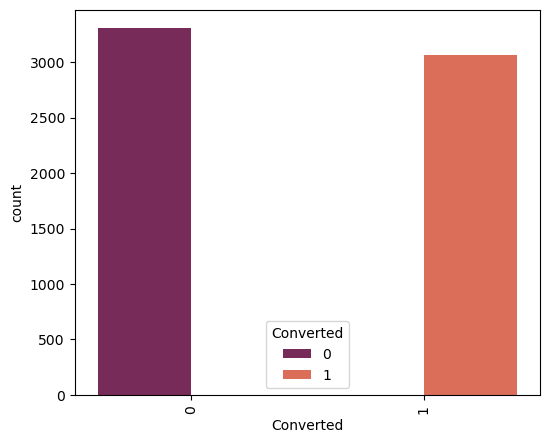

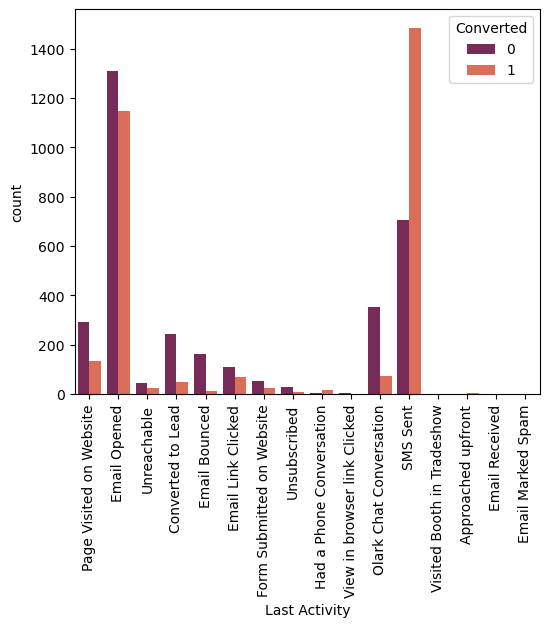

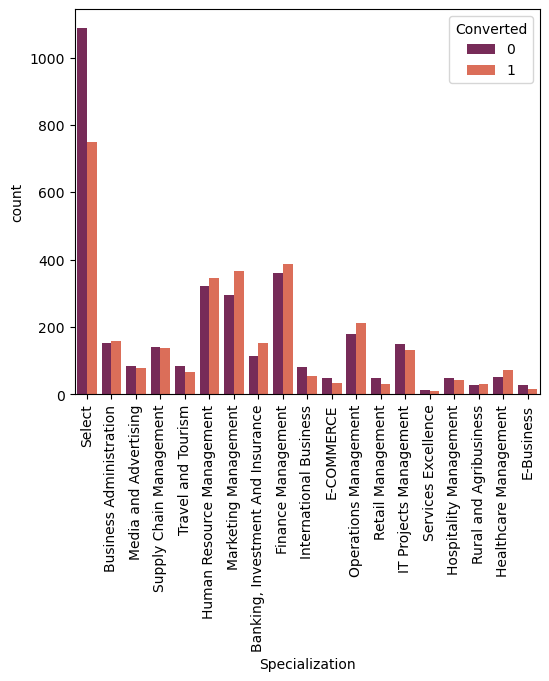

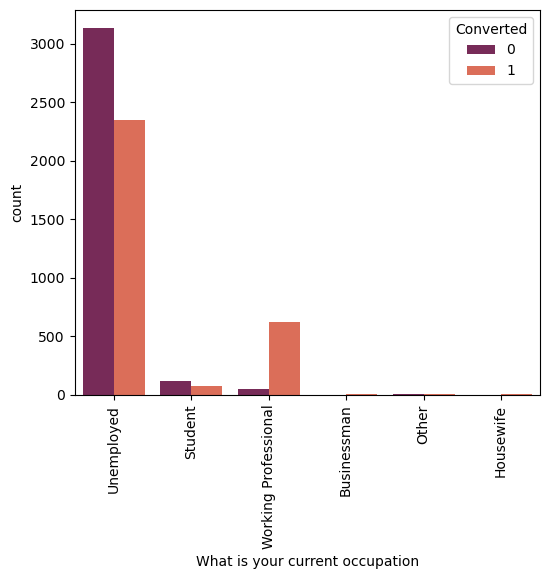

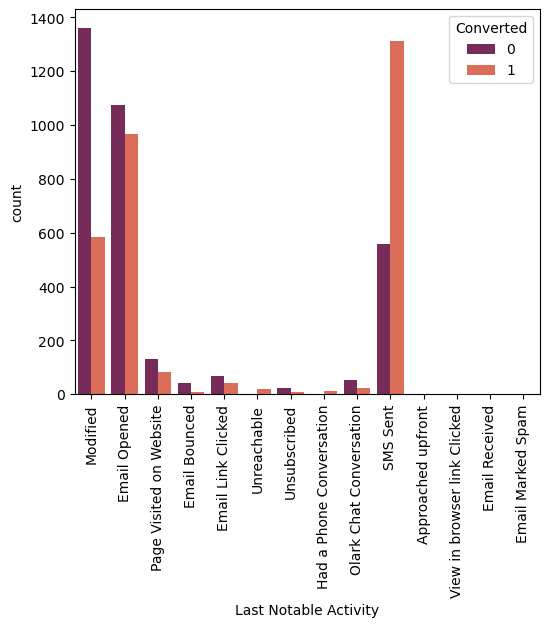

In [31]:
for i in  data:
    
    plt.figure(figsize=(6,5))
    sns.countplot(leads,x=i, hue="Converted", palette="rocket")
    plt.xticks(rotation=90)
    plt.show()

1. The leads that got converted are the leads that are identified from Lead Add Form.
2. Most of the converted lead's last activity were sms sent and emails opened.
3. Banking, Finance, HR specialized leads seems to have higher chance of conversion.
4. Students have low chance of conversion when compared to high chances of unemployed and working professionals. 

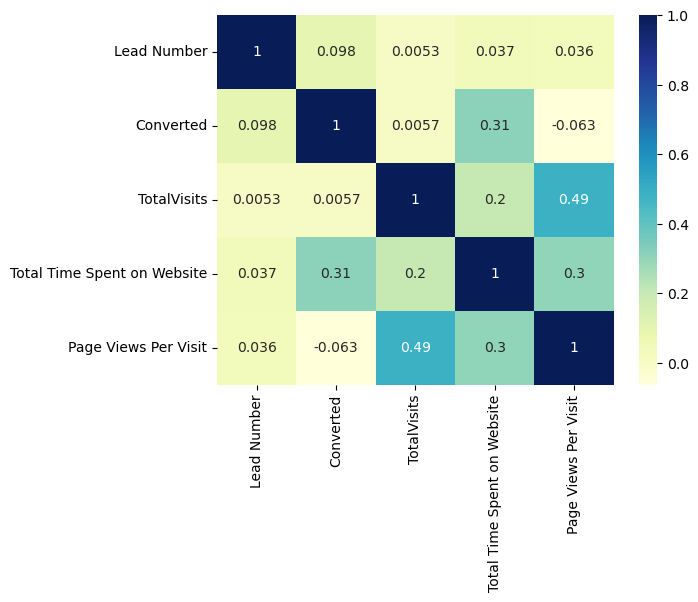

In [32]:
#CORELATION 
sns.heatmap(leads.corr(),annot=True, cmap='YlGnBu')
plt.show()

#### Data preparation

In [33]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Modified


In [34]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'Last Notable Activity'],
      dtype='object')

In [35]:
#### Converting some binary variables (Yes/No) to 0/1

varlist =  ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [36]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Modified


#### Dummy variable creation

In [37]:
## Creating dummy variables for categorical variables

dummy=pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation', 'Last Notable Activity']], drop_first=True)


# Adding the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [38]:
# Dealing with 'Select' in 'Specialization' which is the same as null values

dum= pd.get_dummies(leads["Specialization"],prefix="Specialization")
dum.drop(["Specialization_Select"], axis=1,inplace=True)

In [39]:
leads=pd.concat([leads, dum], axis=1)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,0,0,0,0,0,0,0


In [40]:
## Dropping the fields for those for which we have created dummies

leads = leads.drop([ 'Lead Origin', 'Lead Source', 
       'Last Activity',
       'Specialization', 'What is your current occupation', 'Last Notable Activity'],axis=1)

In [41]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing',
       'Lead Source_testone', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a P

In [42]:
## Dropping unnecessary columns

leads.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [43]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 74 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6373 non-null   int64  
 1   Converted                                             6373 non-null   int64  
 2   TotalVisits                                           6373 non-null   float64
 3   Total Time Spent on Website                           6373 non-null   int64  
 4   Page Views Per Visit                                  6373 non-null   float64
 5   Lead Origin_Landing Page Submission                   6373 non-null   uint8  
 6   Lead Origin_Lead Add Form                             6373 non-null   uint8  
 7   Lead Origin_Lead Import                               6373 non-null   uint8  
 8   Lead Source_Direct Traffic                            6373

### Step 3:  Train - Test split

In [44]:
# Removing Target variable in X
X = leads.drop(['Converted'] ,axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Putting target variable in y

y=leads["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [46]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [47]:
X_train.shape

(4461, 73)

In [48]:
X_test.shape

(1912, 73)

### Step 4: Feature Scaling`

In [49]:
scaler = MinMaxScaler()

X_train[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]] = scaler.fit_transform(X_train[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0,0.015936,0.029489,0.125,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
218,0,0.015936,0.082306,0.250,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,0,0.023904,0.034331,0.375,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4037,0,0.000000,0.000000,0.000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,0,0.000000,0.000000,0.000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# Checking the conversion rate:

conv = (sum(leads['Converted'])/len(leads['Converted'].index))*100
conv

48.093519535540565

We have 48% conversion rate

### Step 5: Correlations

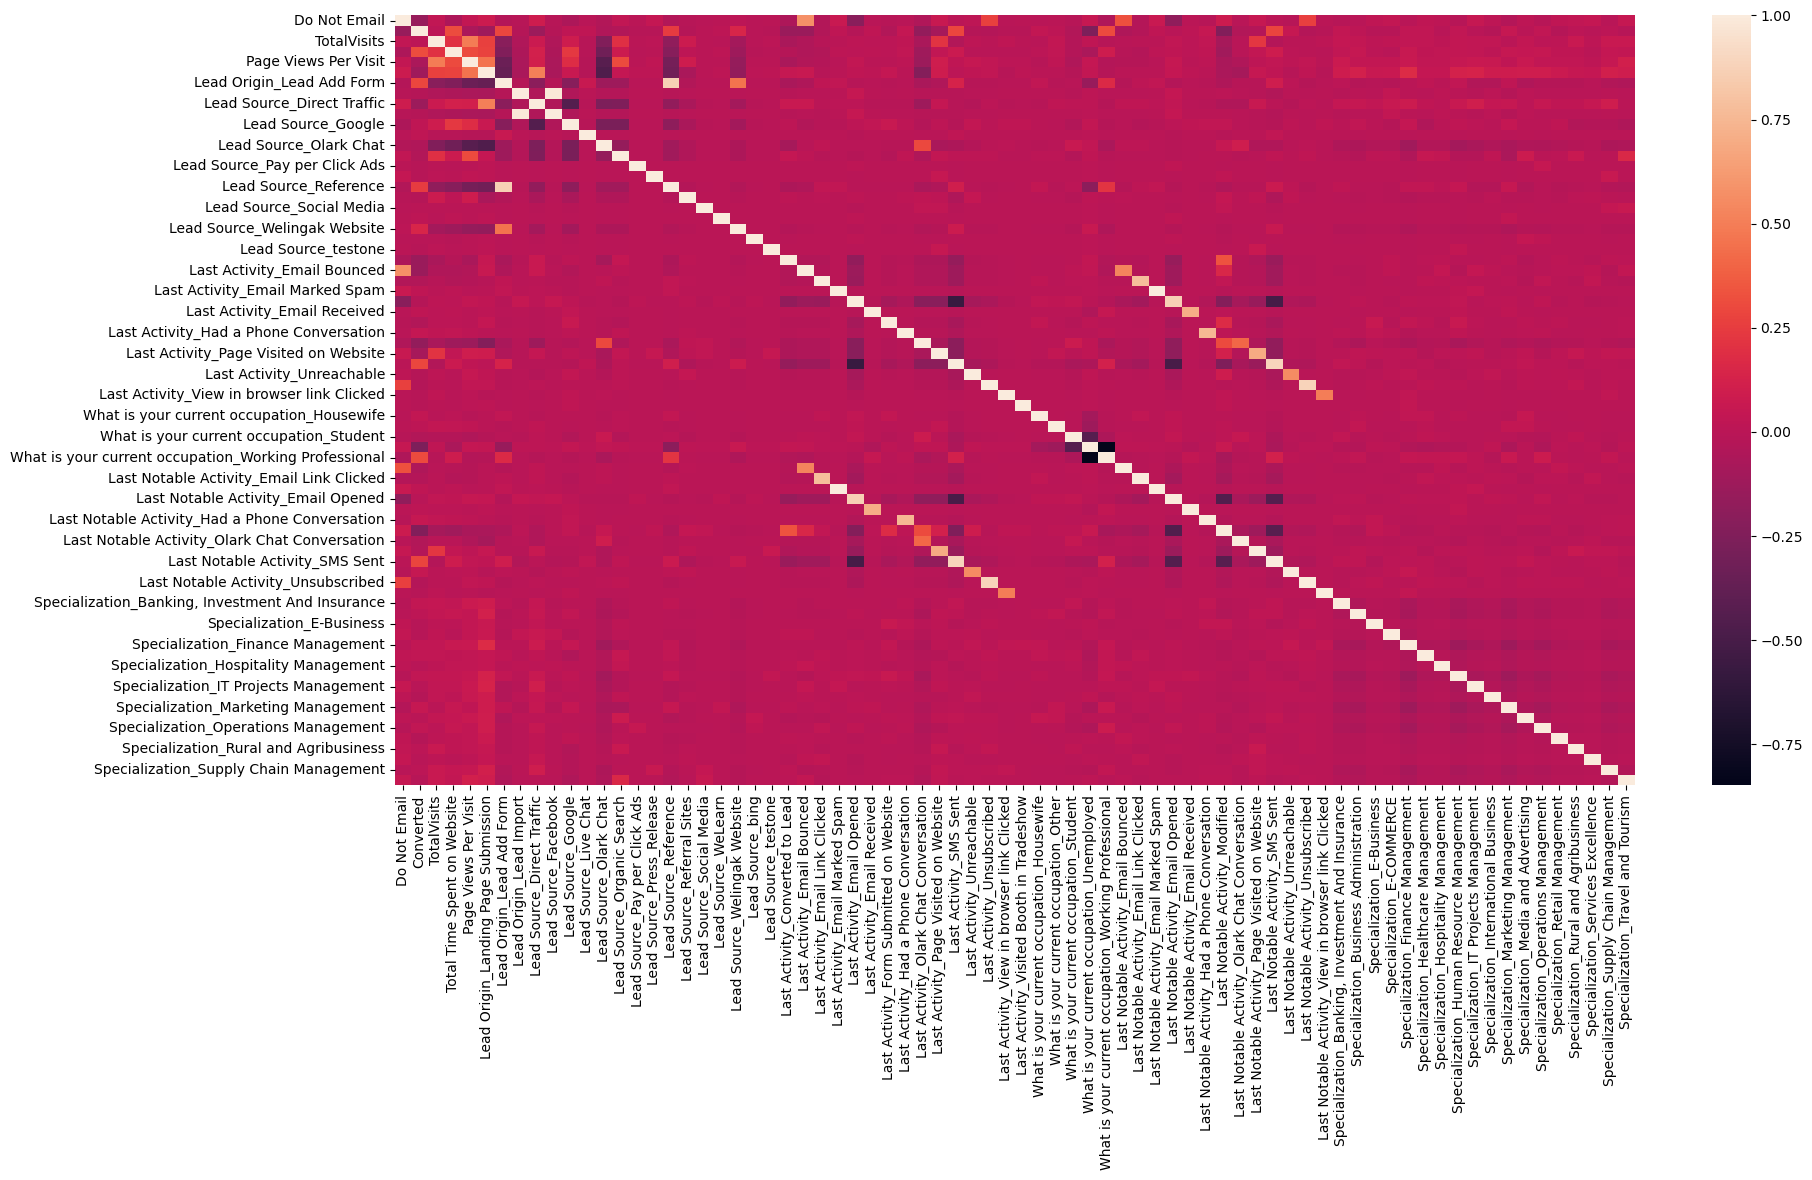

In [51]:
#Checking correlation between the variables
plt.figure(figsize = (20,10))       
sns.heatmap(leads.corr())
plt.show()

### Step 6: Model building

#### First model

Since we more number of variables its better to select features using RFE method

In [52]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4393
Model Family:                Binomial   Df Model:                           67
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 19 Feb 2024   Deviance:                   1.1495e+05
Time:                        03:02:36   Pearson chi2:                 5.62e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -2.661e+15   8.84e+07  -3.01e+07      0.000   -2.66e+15   -2.66e+15
Do Not Email                                         -2.871e+12   5.42e+06  -5.29e+05      0.000   -2.87e+12   -2.87e+12
TotalVisits                                           3.177e+15   5.39e+07   5.89e+07      0.000    3.18e+15    3.18e+15
Total Time Spent on Website                           2.912e+15   4.67e+06   6.24e+08      0.000    2.91e+15    2.91e+15
Page Views Per Visit                                 -1.484e+15   1.16e+07  -1.28e+08      0.000   -1.48e+15   -1.48e+15
Lead Origin_Landing Page Submission                  -1.904e+14   3.75e+06  -5.07e+07      0.000    -1.9e+14    -1.9e+14
Lead Origin_Lead Add Form                             1.858e+15   4.77e+07    3.9e+07      0.000    1.86e+15    1.86e+15
Lead Origin_Lead Import                               3.266e+15   4.21e+07   7.76e+07      0.000    3.27e+15    3.27e+15
Lead Source_Direct Traffic                            5.777e+15   8.25e+07      7e+07      0.000    5.78e+15    5.78e+15
Lead Source_Facebook                                  3.266e+15   4.21e+07   7.76e+07      0.000    3.27e+15    3.27e+15
Lead Source_Google                                    6.189e+15   8.25e+07    7.5e+07      0.000    6.19e+15    6.19e+15
Lead Source_Live Chat                                 9.839e+15   8.24e+07   1.19e+08      0.000    9.84e+15    9.84e+15
Lead Source_Olark Chat                                5.518e+15   8.25e+07   6.69e+07      0.000    5.52e+15    5.52e+15
Lead Source_Organic Search                            6.033e+15   8.26e+07    7.3e+07      0.000    6.03e+15    6.03e+15
Lead Source_Pay per Click Ads                         1.601e+15   1.06e+08    1.5e+07      0.000     1.6e+15     1.6e+15
Lead Source_Press_Release                             1.383e+15   1.07e+08   1.29e+07      0.000    1.38e+15    1.38e+15
Lead Source_Reference                                 5.456e+15   6.74e+07    8.1e+07      0.000    5.46e+15    5.46e+15
Lead Source_Referral Sites                            6.383e+15   8.31e+07   7.68e+07      0.000    6.38e+15    6.38e+15
Lead Source_Social Media                                72.2791   1.27e-06    5.7e+07      0.000      72.279      72.279
Lead Source_WeLearn                                   9.527e+15   1.06e+08   8.95e+07      0.000    9.53e+15    9.53e+15
Lead Source_Welingak Website                          6.039e+15   6.77e+07   8.92e+07      0.000    6.04e+15    6.04e+15
Lead Source_bing                                      1.735e+15   9.52e+07   1.82e+07      0.000    1.73e+15    1.73e+15
Lead Source_testone                                   2.17

In [53]:
# Running RFE with 20 variables as output
logreg = LogisticRegression()
rfe = RFE(logreg, step=20)            
rfe = rfe.fit(X_train, y_train)

In [54]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 3),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Live Chat', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Pay per Click Ads', False, 3),
 ('Lead Source_Press_Release', False, 3),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 2),
 ('Lead Source_Social Media', False, 3),
 ('Lead Source_WeLearn', False, 2),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 2),
 ('Lead Source_testone', False, 2),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 3),
 ('L

In [55]:
col = X_train.columns[rfe.support_]

In [56]:
# Select only the columns selected by RFE

X_train = X_train[col]

##### Assessing the model with StatsModels

In [57]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4424
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2034.4
Date:                Mon, 19 Feb 2024   Deviance:                       4068.8
Time:                        03:02:37   Pearson chi2:                 4.67e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3768
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3466      0.621     -0.558      0.577      -1.564       0.870
Do Not Email                                            -1.1206      0.221     -5.060      0.000      -1.555      -0.687
TotalVisits                                              7.5870      2.925      2.594      0.009       1.855      13.319
Total Time Spent on Website                              4.4068      0.186     23.632      0.000       4.041       4.772
Page Views Per Visit                                    -1.1472      0.448     -2.562      0.010      -2.025      -0.270
Lead Origin_Landing Page Submission                     -0.5458      0.128     -4.253      0.000      -0.797      -0.294
Lead Origin_Lead Add Form                                2.2861      1.169      1.956      0.051      -0.005       4.577
Lead Source_Direct Traffic                              -0.4538      0.101     -4.483      0.000      -0.652      -0.255
Lead Source_Olark Chat                                   1.0901      0.154      7.082      0.000       0.788       1.392
Lead Source_Reference                                    1.2842      1.190      1.080      0.280      -1.047       3.616
Lead Source_Welingak Website                             3.7448      1.539      2.433      0.015       0.728       6.762
Last Activity_Converted to Lead                         -0.7126      0.233     -3.056      0.002      -1.170      -0.256
Last Activity_Email Bounced                             -1.7132      0.678     -2.525      0.012      -3.043      -0.384
Last Activity_Had a Phone Conversation                   1.2043      1.004      1.200      0.230      -0.763       3.172
Last Activity_Olark Chat Conversation                   -1.0452      0.197     -5.316      0.000      -1.430      -0.660
What is your current occupation_Housewife               22.6107   2.38e+04      0.001      0.999   -4.67e+04    4.67e+04
What is your current occupation_Student                 -0.8379      0.644     -1.301      0.193      -2.100       0.424
What is your current occupation_Unemployed              -0.8980      0.605     -1.485      0.138      -2.083       0.287
What is your current occupation_Working Professional     1.6841      0.634      2.656      0.008       0.442       2.927
Last Notable Activity_Email Bounced                      1.4697      0.812      1.811      0.070      -0.121       3.061
Last Notable Activity_Email Link Clicked                -0.9339      0.282     -3.310      0.001      -1.487      -0.381
Last Notable Activity_Had a Phone Conversation          22.1130   2.12e+04      0.001      0.999   -4.15e+04    4.15e+04
Last Notable Activity_Modified                          -0

There are columns containing P value > 0.05, lets check VIF

#### VIF

In [58]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Origin_Lead Add Form,84.69
8,Lead Source_Reference,65.36
9,Lead Source_Welingak Website,20.07
16,What is your current occupation_Unemployed,9.72
4,Lead Origin_Landing Page Submission,6.17
3,Page Views Per Visit,4.84
20,Last Notable Activity_Had a Phone Conversation,2.46
12,Last Activity_Had a Phone Conversation,2.46
2,Total Time Spent on Website,2.42
17,What is your current occupation_Working Profes...,2.32


Dropping 'Lead Origin_Lead Add Form' and 'Lead Source_Reference' as they have pvalue >0.05 and VIF > 5, hence considered insignificant

In [59]:
X_train.drop(['Lead Origin_Lead Add Form','Lead Source_Reference'], axis=1, inplace=True)

#### Second model

In [60]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4426
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2155.9
Date:                Mon, 19 Feb 2024   Deviance:                       4311.8
Time:                        03:02:38   Pearson chi2:                 4.51e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3419
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8670      0.606      1.431      0.152      -0.320       2.054
Do Not Email                                            -0.9458      0.209     -4.515      0.000      -1.356      -0.535
TotalVisits                                              3.9703      2.403      1.652      0.099      -0.740       8.681
Total Time Spent on Website                              3.8284      0.178     21.496      0.000       3.479       4.177
Page Views Per Visit                                    -3.2331      0.425     -7.601      0.000      -4.067      -2.399
Lead Origin_Landing Page Submission                     -1.0951      0.122     -8.984      0.000      -1.334      -0.856
Lead Source_Direct Traffic                              -0.6139      0.099     -6.204      0.000      -0.808      -0.420
Lead Source_Olark Chat                                   0.0065      0.131      0.049      0.961      -0.251       0.264
Lead Source_Welingak Website                             4.9065      1.012      4.847      0.000       2.923       6.891
Last Activity_Converted to Lead                         -1.1983      0.226     -5.291      0.000      -1.642      -0.754
Last Activity_Email Bounced                             -2.1684      0.677     -3.204      0.001      -3.495      -0.842
Last Activity_Had a Phone Conversation                   0.9126      0.998      0.915      0.360      -1.043       2.868
Last Activity_Olark Chat Conversation                   -1.2441      0.192     -6.468      0.000      -1.621      -0.867
What is your current occupation_Housewife               22.5299   2.52e+04      0.001      0.999   -4.93e+04    4.94e+04
What is your current occupation_Student                 -0.9423      0.632     -1.491      0.136      -2.181       0.297
What is your current occupation_Unemployed              -1.0324      0.595     -1.736      0.083      -2.198       0.133
What is your current occupation_Working Professional     1.6607      0.623      2.665      0.008       0.439       2.882
Last Notable Activity_Email Bounced                      1.6072      0.810      1.984      0.047       0.020       3.195
Last Notable Activity_Email Link Clicked                -0.7904      0.266     -2.972      0.003      -1.312      -0.269
Last Notable Activity_Had a Phone Conversation          22.3681   2.14e+04      0.001      0.999   -4.19e+04     4.2e+04
Last Notable Activity_Modified                          -0.7816      0.095     -8.221      0.000      -0.968      -0.595
Last Notable Activity_Unreachable                        1.8448      0.799      2.310      0.021       0.279       3.410
Specialization_Banking, Investment And Insurance         1

In [61]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,What is your current occupation_Unemployed,6.95
4,Lead Origin_Landing Page Submission,5.51
3,Page Views Per Visit,4.37
18,Last Notable Activity_Had a Phone Conversation,2.46
10,Last Activity_Had a Phone Conversation,2.46
2,Total Time Spent on Website,2.28
9,Last Activity_Email Bounced,2.03
19,Last Notable Activity_Modified,2.02
5,Lead Source_Direct Traffic,2.01
6,Lead Source_Olark Chat,1.86


In [62]:
# Dropping columns with very p value 
X_train.drop(['Last Notable Activity_Had a Phone Conversation',"What is your current occupation_Housewife"], axis=1, inplace=True)

#### Third model

In [63]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4428
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2159.8
Date:                Mon, 19 Feb 2024   Deviance:                       4319.6
Time:                        03:02:39   Pearson chi2:                 4.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3408
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4200      0.551      2.576      0.010       0.340       2.500
Do Not Email                                            -0.9515      0.210     -4.538      0.000      -1.362      -0.540
TotalVisits                                              3.8754      2.376      1.631      0.103      -0.781       8.532
Total Time Spent on Website                              3.8237      0.178     21.479      0.000       3.475       4.173
Page Views Per Visit                                    -3.2646      0.425     -7.690      0.000      -4.097      -2.433
Lead Origin_Landing Page Submission                     -1.0813      0.122     -8.900      0.000      -1.319      -0.843
Lead Source_Direct Traffic                              -0.6261      0.099     -6.337      0.000      -0.820      -0.432
Lead Source_Olark Chat                                   0.0022      0.131      0.017      0.987      -0.255       0.259
Lead Source_Welingak Website                             4.9040      1.012      4.844      0.000       2.920       6.888
Last Activity_Converted to Lead                         -1.1933      0.226     -5.272      0.000      -1.637      -0.750
Last Activity_Email Bounced                             -2.1602      0.677     -3.192      0.001      -3.487      -0.834
Last Activity_Had a Phone Conversation                   2.1163      0.809      2.617      0.009       0.531       3.701
Last Activity_Olark Chat Conversation                   -1.2375      0.192     -6.435      0.000      -1.614      -0.861
What is your current occupation_Student                 -1.4904      0.582     -2.562      0.010      -2.631      -0.350
What is your current occupation_Unemployed              -1.5794      0.541     -2.919      0.004      -2.640      -0.519
What is your current occupation_Working Professional     1.1121      0.572      1.944      0.052      -0.009       2.233
Last Notable Activity_Email Bounced                      1.6042      0.810      1.981      0.048       0.017       3.192
Last Notable Activity_Email Link Clicked                -0.7791      0.264     -2.946      0.003      -1.297      -0.261
Last Notable Activity_Modified                          -0.7901      0.095     -8.327      0.000      -0.976      -0.604
Last Notable Activity_Unreachable                        1.8420      0.799      2.306      0.021       0.276       3.408
Specialization_Banking, Investment And Insurance         1.5068      0.210      7.173      0.000       1.095       1.919
Specialization_Business Administration                   0.8273      0.186      4.436      0.000       0.462       1.193
Specialization_E-Business                                1

In [64]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,What is your current occupation_Unemployed,6.90
4,Lead Origin_Landing Page Submission,5.51
3,Page Views Per Visit,4.37
2,Total Time Spent on Website,2.27
9,Last Activity_Email Bounced,2.03
5,Lead Source_Direct Traffic,2.01
17,Last Notable Activity_Modified,2.01
6,Lead Source_Olark Chat,1.86
1,TotalVisits,1.83
14,What is your current occupation_Working Profes...,1.74


Dropping columns with high p values ie > 0.05

In [65]:
X_train.drop(["Lead Source_Olark Chat"], axis=1, inplace=True)

#### Fourth model

In [66]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4429
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2159.8
Date:                Mon, 19 Feb 2024   Deviance:                       4319.6
Time:                        03:02:40   Pearson chi2:                 4.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3408
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4211      0.547      2.597      0.009       0.348       2.494
Do Not Email                                            -0.9515      0.210     -4.538      0.000      -1.362      -0.540
TotalVisits                                              3.8731      2.371      1.633      0.102      -0.775       8.521
Total Time Spent on Website                              3.8232      0.175     21.789      0.000       3.479       4.167
Page Views Per Visit                                    -3.2666      0.408     -8.007      0.000      -4.066      -2.467
Lead Origin_Landing Page Submission                     -1.0816      0.121     -8.973      0.000      -1.318      -0.845
Lead Source_Direct Traffic                              -0.6262      0.098     -6.363      0.000      -0.819      -0.433
Lead Source_Welingak Website                             4.9029      1.010      4.853      0.000       2.923       6.883
Last Activity_Converted to Lead                         -1.1936      0.225     -5.296      0.000      -1.635      -0.752
Last Activity_Email Bounced                             -2.1602      0.677     -3.192      0.001      -3.487      -0.834
Last Activity_Had a Phone Conversation                   2.1163      0.809      2.617      0.009       0.531       3.701
Last Activity_Olark Chat Conversation                   -1.2371      0.191     -6.479      0.000      -1.611      -0.863
What is your current occupation_Student                 -1.4903      0.582     -2.562      0.010      -2.630      -0.350
What is your current occupation_Unemployed              -1.5794      0.541     -2.919      0.004      -2.640      -0.519
What is your current occupation_Working Professional     1.1120      0.572      1.944      0.052      -0.009       2.233
Last Notable Activity_Email Bounced                      1.6041      0.810      1.981      0.048       0.017       3.191
Last Notable Activity_Email Link Clicked                -0.7790      0.264     -2.946      0.003      -1.297      -0.261
Last Notable Activity_Modified                          -0.7902      0.095     -8.337      0.000      -0.976      -0.604
Last Notable Activity_Unreachable                        1.8419      0.799      2.306      0.021       0.276       3.408
Specialization_Banking, Investment And Insurance         1.5067      0.210      7.178      0.000       1.095       1.918
Specialization_Business Administration                   0.8271      0.186      4.442      0.000       0.462       1.192
Specialization_E-Business                                1.0510      0.423      2.486      0.013       0.222       1.880
Specialization_E-COMMERCE                                1

In [67]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Landing Page Submission,5.41
12,What is your current occupation_Unemployed,4.53
3,Page Views Per Visit,4.05
2,Total Time Spent on Website,2.20
8,Last Activity_Email Bounced,2.03
16,Last Notable Activity_Modified,2.01
5,Lead Source_Direct Traffic,1.99
1,TotalVisits,1.82
0,Do Not Email,1.67
22,Specialization_Finance Management,1.62


In [68]:
X_train.drop(["TotalVisits"], axis=1, inplace=True)

#### Fifth Model

In [69]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4430
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2161.7
Date:                Mon, 19 Feb 2024   Deviance:                       4323.5
Time:                        03:02:41   Pearson chi2:                 4.51e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3402
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4577      0.547      2.663      0.008       0.385       2.531
Do Not Email                                            -0.9394      0.210     -4.483      0.000      -1.350      -0.529
Total Time Spent on Website                              3.8297      0.175     21.853      0.000       3.486       4.173
Page Views Per Visit                                    -3.0136      0.375     -8.039      0.000      -3.748      -2.279
Lead Origin_Landing Page Submission                     -1.0726      0.120     -8.913      0.000      -1.308      -0.837
Lead Source_Direct Traffic                              -0.6261      0.098     -6.366      0.000      -0.819      -0.433
Lead Source_Welingak Website                             4.8941      1.010      4.845      0.000       2.914       6.874
Last Activity_Converted to Lead                         -1.2046      0.225     -5.348      0.000      -1.646      -0.763
Last Activity_Email Bounced                             -2.1752      0.676     -3.219      0.001      -3.500      -0.851
Last Activity_Had a Phone Conversation                   2.1484      0.806      2.665      0.008       0.568       3.729
Last Activity_Olark Chat Conversation                   -1.2258      0.190     -6.440      0.000      -1.599      -0.853
What is your current occupation_Student                 -1.5245      0.582     -2.620      0.009      -2.665      -0.384
What is your current occupation_Unemployed              -1.6063      0.541     -2.967      0.003      -2.667      -0.545
What is your current occupation_Working Professional     1.0795      0.572      1.886      0.059      -0.042       2.201
Last Notable Activity_Email Bounced                      1.6197      0.808      2.004      0.045       0.035       3.204
Last Notable Activity_Email Link Clicked                -0.7748      0.264     -2.930      0.003      -1.293      -0.256
Last Notable Activity_Modified                          -0.7968      0.095     -8.415      0.000      -0.982      -0.611
Last Notable Activity_Unreachable                        1.8327      0.799      2.295      0.022       0.267       3.398
Specialization_Banking, Investment And Insurance         1.5104      0.210      7.203      0.000       1.099       1.921
Specialization_Business Administration                   0.8322      0.186      4.474      0.000       0.468       1.197
Specialization_E-Business                                1.0474      0.423      2.473      0.013       0.217       1.877
Specialization_E-COMMERCE                                1.1960      0.338      3.538      0.000       0.533       1.859
Specialization_Finance Management                        0

In [70]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,5.40
11,What is your current occupation_Unemployed,4.52
2,Page Views Per Visit,3.59
1,Total Time Spent on Website,2.20
7,Last Activity_Email Bounced,2.03
15,Last Notable Activity_Modified,2.00
4,Lead Source_Direct Traffic,1.99
0,Do Not Email,1.66
21,Specialization_Finance Management,1.62
12,What is your current occupation_Working Profes...,1.54


In [71]:
X_train.drop(["What is your current occupation_Working Professional"], axis=1, inplace=True)

#### Sixth Model

In [72]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4431
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2163.3
Date:                Mon, 19 Feb 2024   Deviance:                       4326.6
Time:                        03:02:42   Pearson chi2:                 4.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3397
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                2.4467      0.197     12.435      0.000       2.061       2.832
Do Not Email                                        -0.9415      0.210     -4.493      0.000      -1.352      -0.531
Total Time Spent on Website                          3.8282      0.175     21.851      0.000       3.485       4.172
Page Views Per Visit                                -3.0329      0.375     -8.088      0.000      -3.768      -2.298
Lead Origin_Landing Page Submission                 -1.0717      0.120     -8.907      0.000      -1.308      -0.836
Lead Source_Direct Traffic                          -0.6278      0.098     -6.383      0.000      -0.821      -0.435
Lead Source_Welingak Website                         4.8933      1.010      4.844      0.000       2.913       6.873
Last Activity_Converted to Lead                     -1.1921      0.224     -5.311      0.000      -1.632      -0.752
Last Activity_Email Bounced                         -2.1506      0.672     -3.202      0.001      -3.467      -0.834
Last Activity_Had a Phone Conversation               2.1541      0.806      2.672      0.008       0.574       3.734
Last Activity_Olark Chat Conversation               -1.2212      0.190     -6.423      0.000      -1.594      -0.849
What is your current occupation_Student             -2.5114      0.281     -8.937      0.000      -3.062      -1.961
What is your current occupation_Unemployed          -2.5924      0.184    -14.075      0.000      -2.953      -2.231
Last Notable Activity_Email Bounced                  1.6051      0.804      1.996      0.046       0.029       3.181
Last Notable Activity_Email Link Clicked            -0.7782      0.265     -2.938      0.003      -1.297      -0.259
Last Notable Activity_Modified                      -0.8018      0.095     -8.465      0.000      -0.987      -0.616
Last Notable Activity_Unreachable                    1.8312      0.799      2.293      0.022       0.266       3.396
Specialization_Banking, Investment And Insurance     1.5150      0.210      7.230      0.000       1.104       1.926
Specialization_Business Administration               0.8237      0.186      4.422      0.000       0.459       1.189
Specialization_E-Business                            1.0511      0.424      2.482      0.013       0.221       1.881
Specialization_E-COMMERCE                            1.2013      0.338      3.556      0.000       0.539       1.864
Specialization_Finance Management                    0.8956      0.142      6.320      0.000       0.618       1.173
Specialization_Healthcare Management                 1.2455      0.286      4.347      0.000       0.684       1.807
Specialization_Human Resource Management 

In [73]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,5.36
2,Page Views Per Visit,3.50
11,What is your current occupation_Unemployed,3.49
1,Total Time Spent on Website,2.12
7,Last Activity_Email Bounced,2.03
14,Last Notable Activity_Modified,1.98
4,Lead Source_Direct Traffic,1.98
0,Do Not Email,1.66
20,Specialization_Finance Management,1.50
12,Last Notable Activity_Email Bounced,1.43


In [74]:
X_train.drop(["Lead Origin_Landing Page Submission"], axis=1, inplace=True)

#### Seventh Model

In [75]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4432
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2204.5
Date:                Mon, 19 Feb 2024   Deviance:                       4409.1
Time:                        03:02:42   Pearson chi2:                 4.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3274
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                2.5232      0.196     12.876      0.000       2.139       2.907
Do Not Email                                        -0.9644      0.205     -4.708      0.000      -1.366      -0.563
Total Time Spent on Website                          3.6720      0.172     21.354      0.000       3.335       4.009
Page Views Per Visit                                -4.3804      0.350    -12.512      0.000      -5.067      -3.694
Lead Source_Direct Traffic                          -0.9988      0.089    -11.168      0.000      -1.174      -0.824
Lead Source_Welingak Website                         4.9209      1.010      4.873      0.000       2.941       6.900
Last Activity_Converted to Lead                     -1.2742      0.222     -5.734      0.000      -1.710      -0.839
Last Activity_Email Bounced                         -2.3167      0.676     -3.425      0.001      -3.642      -0.991
Last Activity_Had a Phone Conversation               2.1737      0.813      2.672      0.008       0.579       3.768
Last Activity_Olark Chat Conversation               -1.0882      0.187     -5.812      0.000      -1.455      -0.721
What is your current occupation_Student             -2.5502      0.276     -9.228      0.000      -3.092      -2.009
What is your current occupation_Unemployed          -2.6690      0.183    -14.574      0.000      -3.028      -2.310
Last Notable Activity_Email Bounced                  1.7046      0.813      2.096      0.036       0.111       3.298
Last Notable Activity_Email Link Clicked            -0.7559      0.263     -2.880      0.004      -1.270      -0.241
Last Notable Activity_Modified                      -0.7908      0.093     -8.466      0.000      -0.974      -0.608
Last Notable Activity_Unreachable                    1.8901      0.791      2.389      0.017       0.340       3.441
Specialization_Banking, Investment And Insurance     1.1081      0.200      5.540      0.000       0.716       1.500
Specialization_Business Administration               0.3475      0.176      1.971      0.049       0.002       0.693
Specialization_E-Business                            0.5712      0.416      1.372      0.170      -0.245       1.387
Specialization_E-COMMERCE                            0.7504      0.328      2.286      0.022       0.107       1.394
Specialization_Finance Management                    0.4285      0.129      3.324      0.001       0.176       0.681
Specialization_Healthcare Management                 0.8586      0.278      3.085      0.002       0.313       1.404
Specialization_Human Resource Management             0.4163      0.132      3.156      0.002       0.158       0.675
Specialization_IT Projects Management    

In [76]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.47
2,Page Views Per Visit,2.94
1,Total Time Spent on Website,2.11
6,Last Activity_Email Bounced,2.02
13,Last Notable Activity_Modified,1.98
0,Do Not Email,1.66
3,Lead Source_Direct Traffic,1.61
11,Last Notable Activity_Email Bounced,1.43
19,Specialization_Finance Management,1.34
21,Specialization_Human Resource Management,1.30


In [77]:
X_train.drop(["Specialization_Rural and Agribusiness","Specialization_Travel and Tourism","Specialization_E-Business",
              "Specialization_IT Projects Management","Specialization_Operations Management"], axis=1, inplace=True)

#### Eighth Model

In [78]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4437
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2209.4
Date:                Mon, 19 Feb 2024   Deviance:                       4418.7
Time:                        03:02:43   Pearson chi2:                 4.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3259
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                2.6109      0.192     13.571      0.000       2.234       2.988
Do Not Email                                        -0.9463      0.205     -4.614      0.000      -1.348      -0.544
Total Time Spent on Website                          3.6881      0.172     21.481      0.000       3.352       4.025
Page Views Per Visit                                -4.1759      0.341    -12.229      0.000      -4.845      -3.507
Lead Source_Direct Traffic                          -0.9462      0.087    -10.818      0.000      -1.118      -0.775
Lead Source_Welingak Website                         4.8640      1.010      4.818      0.000       2.885       6.843
Last Activity_Converted to Lead                     -1.2739      0.222     -5.728      0.000      -1.710      -0.838
Last Activity_Email Bounced                         -2.3078      0.677     -3.410      0.001      -3.634      -0.981
Last Activity_Had a Phone Conversation               2.1511      0.809      2.658      0.008       0.565       3.737
Last Activity_Olark Chat Conversation               -1.1242      0.186     -6.042      0.000      -1.489      -0.760
What is your current occupation_Student             -2.5690      0.275     -9.353      0.000      -3.107      -2.031
What is your current occupation_Unemployed          -2.6960      0.182    -14.810      0.000      -3.053      -2.339
Last Notable Activity_Email Bounced                  1.6547      0.814      2.034      0.042       0.060       3.249
Last Notable Activity_Email Link Clicked            -0.7638      0.262     -2.917      0.004      -1.277      -0.251
Last Notable Activity_Modified                      -0.7930      0.093     -8.516      0.000      -0.975      -0.610
Last Notable Activity_Unreachable                    1.8738      0.789      2.376      0.018       0.328       3.420
Specialization_Banking, Investment And Insurance     0.9815      0.195      5.032      0.000       0.599       1.364
Specialization_Business Administration               0.2271      0.171      1.325      0.185      -0.109       0.563
Specialization_E-COMMERCE                            0.6227      0.325      1.915      0.056      -0.015       1.260
Specialization_Finance Management                    0.3080      0.122      2.520      0.012       0.068       0.547
Specialization_Healthcare Management                 0.7344      0.275      2.673      0.008       0.196       1.273
Specialization_Human Resource Management             0.2960      0.125      2.361      0.018       0.050       0.542
Specialization_Marketing Management                  0.4972      0.128      3.874      0.000       0.246       0.749
Specialization_Supply Chain Management   

In [79]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.36
2,Page Views Per Visit,2.80
1,Total Time Spent on Website,2.08
6,Last Activity_Email Bounced,2.02
13,Last Notable Activity_Modified,1.97
0,Do Not Email,1.65
3,Lead Source_Direct Traffic,1.53
11,Last Notable Activity_Email Bounced,1.42
8,Last Activity_Olark Chat Conversation,1.28
5,Last Activity_Converted to Lead,1.28


In [80]:
X_train.drop(["Specialization_E-COMMERCE","Specialization_Business Administration"], axis=1, inplace=True)

#### Ninth Model

In [81]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4439
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2211.9
Date:                Mon, 19 Feb 2024   Deviance:                       4423.8
Time:                        03:02:43   Pearson chi2:                 4.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3252
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                2.6489      0.192     13.831      0.000       2.274       3.024
Do Not Email                                        -0.9408      0.205     -4.593      0.000      -1.342      -0.539
Total Time Spent on Website                          3.6880      0.171     21.515      0.000       3.352       4.024
Page Views Per Visit                                -4.1199      0.340    -12.126      0.000      -4.786      -3.454
Lead Source_Direct Traffic                          -0.9267      0.087    -10.655      0.000      -1.097      -0.756
Lead Source_Welingak Website                         4.8429      1.009      4.797      0.000       2.864       6.821
Last Activity_Converted to Lead                     -1.2763      0.222     -5.737      0.000      -1.712      -0.840
Last Activity_Email Bounced                         -2.3036      0.671     -3.432      0.001      -3.619      -0.988
Last Activity_Had a Phone Conversation               2.1513      0.809      2.661      0.008       0.567       3.736
Last Activity_Olark Chat Conversation               -1.1377      0.185     -6.140      0.000      -1.501      -0.775
What is your current occupation_Student             -2.5836      0.275     -9.406      0.000      -3.122      -2.045
What is your current occupation_Unemployed          -2.7112      0.182    -14.889      0.000      -3.068      -2.354
Last Notable Activity_Email Bounced                  1.6173      0.809      2.000      0.046       0.032       3.202
Last Notable Activity_Email Link Clicked            -0.7721      0.261     -2.954      0.003      -1.284      -0.260
Last Notable Activity_Modified                      -0.7886      0.093     -8.482      0.000      -0.971      -0.606
Last Notable Activity_Unreachable                    1.8972      0.787      2.412      0.016       0.355       3.439
Specialization_Banking, Investment And Insurance     0.9383      0.194      4.845      0.000       0.559       1.318
Specialization_Finance Management                    0.2668      0.120      2.217      0.027       0.031       0.503
Specialization_Healthcare Management                 0.6922      0.274      2.528      0.011       0.156       1.229
Specialization_Human Resource Management             0.2549      0.124      2.063      0.039       0.013       0.497
Specialization_Marketing Management                  0.4559      0.127      3.603      0.000       0.208       0.704
Specialization_Supply Chain Management               0.3519      0.194      1.816      0.069      -0.028       0.732
====================================================================================================================
"""

In [82]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.33
2,Page Views Per Visit,2.77
1,Total Time Spent on Website,2.06
6,Last Activity_Email Bounced,2.02
13,Last Notable Activity_Modified,1.97
0,Do Not Email,1.65
3,Lead Source_Direct Traffic,1.52
11,Last Notable Activity_Email Bounced,1.42
5,Last Activity_Converted to Lead,1.28
8,Last Activity_Olark Chat Conversation,1.27


In [83]:
X_train.drop(["Specialization_Supply Chain Management"],axis=1,inplace=True)

#### Tenth Model

In [84]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4440
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2213.5
Date:                Mon, 19 Feb 2024   Deviance:                       4427.1
Time:                        03:02:44   Pearson chi2:                 4.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3247
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                2.6736      0.191     13.988      0.000       2.299       3.048
Do Not Email                                        -0.9362      0.205     -4.566      0.000      -1.338      -0.534
Total Time Spent on Website                          3.6914      0.171     21.544      0.000       3.356       4.027
Page Views Per Visit                                -4.0795      0.338    -12.052      0.000      -4.743      -3.416
Lead Source_Direct Traffic                          -0.9104      0.086    -10.533      0.000      -1.080      -0.741
Lead Source_Welingak Website                         4.8305      1.009      4.785      0.000       2.852       6.809
Last Activity_Converted to Lead                     -1.2803      0.223     -5.748      0.000      -1.717      -0.844
Last Activity_Email Bounced                         -2.3222      0.672     -3.458      0.001      -3.638      -1.006
Last Activity_Had a Phone Conversation               2.1372      0.808      2.644      0.008       0.553       3.722
Last Activity_Olark Chat Conversation               -1.1476      0.185     -6.199      0.000      -1.510      -0.785
What is your current occupation_Student             -2.6006      0.274     -9.478      0.000      -3.138      -2.063
What is your current occupation_Unemployed          -2.7244      0.182    -14.967      0.000      -3.081      -2.368
Last Notable Activity_Email Bounced                  1.6224      0.809      2.004      0.045       0.036       3.209
Last Notable Activity_Email Link Clicked            -0.7717      0.261     -2.953      0.003      -1.284      -0.259
Last Notable Activity_Modified                      -0.7821      0.093     -8.424      0.000      -0.964      -0.600
Last Notable Activity_Unreachable                    1.9259      0.788      2.443      0.015       0.381       3.471
Specialization_Banking, Investment And Insurance     0.9098      0.193      4.716      0.000       0.532       1.288
Specialization_Finance Management                    0.2394      0.119      2.006      0.045       0.005       0.473
Specialization_Healthcare Management                 0.6643      0.273      2.431      0.015       0.129       1.200
Specialization_Human Resource Management             0.2277      0.123      1.857      0.063      -0.013       0.468
Specialization_Marketing Management                  0.4284      0.126      3.412      0.001       0.182       0.674
====================================================================================================================
"""

In [85]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.32
2,Page Views Per Visit,2.76
1,Total Time Spent on Website,2.06
6,Last Activity_Email Bounced,2.02
13,Last Notable Activity_Modified,1.97
0,Do Not Email,1.65
3,Lead Source_Direct Traffic,1.50
11,Last Notable Activity_Email Bounced,1.42
5,Last Activity_Converted to Lead,1.28
8,Last Activity_Olark Chat Conversation,1.27


In [86]:
X_train.drop(["Specialization_Human Resource Management"],axis=1,inplace=True)

In [87]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4441
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2215.3
Date:                Mon, 19 Feb 2024   Deviance:                       4430.5
Time:                        03:02:44   Pearson chi2:                 4.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3242
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                2.7109      0.190     14.271      0.000       2.339       3.083
Do Not Email                                        -0.9467      0.205     -4.620      0.000      -1.348      -0.545
Total Time Spent on Website                          3.6965      0.171     21.567      0.000       3.361       4.032
Page Views Per Visit                                -4.0304      0.337    -11.965      0.000      -4.691      -3.370
Lead Source_Direct Traffic                          -0.8990      0.086    -10.432      0.000      -1.068      -0.730
Lead Source_Welingak Website                         4.8170      1.009      4.773      0.000       2.839       6.795
Last Activity_Converted to Lead                     -1.2803      0.223     -5.746      0.000      -1.717      -0.844
Last Activity_Email Bounced                         -2.3295      0.672     -3.466      0.001      -3.647      -1.012
Last Activity_Had a Phone Conversation               2.1727      0.813      2.671      0.008       0.579       3.767
Last Activity_Olark Chat Conversation               -1.1681      0.184     -6.333      0.000      -1.530      -0.807
What is your current occupation_Student             -2.6078      0.274     -9.512      0.000      -3.145      -2.070
What is your current occupation_Unemployed          -2.7379      0.182    -15.053      0.000      -3.094      -2.381
Last Notable Activity_Email Bounced                  1.6228      0.810      2.002      0.045       0.034       3.211
Last Notable Activity_Email Link Clicked            -0.7709      0.262     -2.943      0.003      -1.284      -0.258
Last Notable Activity_Modified                      -0.7799      0.093     -8.407      0.000      -0.962      -0.598
Last Notable Activity_Unreachable                    1.9081      0.788      2.421      0.015       0.363       3.453
Specialization_Banking, Investment And Insurance     0.8697      0.192      4.538      0.000       0.494       1.245
Specialization_Finance Management                    0.2013      0.118      1.713      0.087      -0.029       0.432
Specialization_Healthcare Management                 0.6258      0.272      2.297      0.022       0.092       1.160
Specialization_Marketing Management                  0.3900      0.124      3.150      0.002       0.147       0.633
====================================================================================================================
"""

In [88]:
X_train.drop(["Specialization_Finance Management"],axis=1,inplace=True)

#### Final Model

In [89]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4442
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2216.7
Date:                Mon, 19 Feb 2024   Deviance:                       4433.4
Time:                        03:02:44   Pearson chi2:                 4.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3237
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                2.7355      0.189     14.453      0.000       2.365       3.106
Do Not Email                                        -0.9463      0.205     -4.620      0.000      -1.348      -0.545
Total Time Spent on Website                          3.7032      0.171     21.625      0.000       3.368       4.039
Page Views Per Visit                                -3.9986      0.336    -11.906      0.000      -4.657      -3.340
Lead Source_Direct Traffic                          -0.8868      0.086    -10.330      0.000      -1.055      -0.719
Lead Source_Welingak Website                         4.8018      1.009      4.758      0.000       2.824       6.780
Last Activity_Converted to Lead                     -1.2797      0.223     -5.748      0.000      -1.716      -0.843
Last Activity_Email Bounced                         -2.3373      0.673     -3.475      0.001      -3.656      -1.019
Last Activity_Had a Phone Conversation               2.1508      0.813      2.647      0.008       0.558       3.743
Last Activity_Olark Chat Conversation               -1.1739      0.184     -6.384      0.000      -1.534      -0.813
What is your current occupation_Student             -2.6077      0.274     -9.518      0.000      -3.145      -2.071
What is your current occupation_Unemployed          -2.7439      0.182    -15.097      0.000      -3.100      -2.388
Last Notable Activity_Email Bounced                  1.6241      0.810      2.004      0.045       0.036       3.212
Last Notable Activity_Email Link Clicked            -0.7698      0.262     -2.940      0.003      -1.283      -0.257
Last Notable Activity_Modified                      -0.7812      0.093     -8.427      0.000      -0.963      -0.599
Last Notable Activity_Unreachable                    1.9647      0.788      2.494      0.013       0.421       3.509
Specialization_Banking, Investment And Insurance     0.8385      0.191      4.396      0.000       0.465       1.212
Specialization_Healthcare Management                 0.5952      0.272      2.190      0.029       0.062       1.128
Specialization_Marketing Management                  0.3596      0.123      2.935      0.003       0.119       0.600
====================================================================================================================
"""

In [90]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.23
2,Page Views Per Visit,2.72
1,Total Time Spent on Website,2.04
6,Last Activity_Email Bounced,2.02
13,Last Notable Activity_Modified,1.96
0,Do Not Email,1.65
3,Lead Source_Direct Traffic,1.48
11,Last Notable Activity_Email Bounced,1.42
5,Last Activity_Converted to Lead,1.28
8,Last Activity_Olark Chat Conversation,1.26


p-values and VIF values for all the columns are appropriate

### Step 7: Model evaluation

In [91]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8003    0.216557
218     0.085391
4171    0.045272
4037    0.497892
3660    0.497892
207     0.189132
2044    0.122989
6411    0.983711
6498    0.016829
2085    0.991783
dtype: float64

In [92]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21655691, 0.08539087, 0.04527167, 0.49789186, 0.49789186,
       0.18913224, 0.12298876, 0.98371112, 0.01682942, 0.99178321])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [93]:
y_train_pred_final = pd.DataFrame({'Conv':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final.head()

,Conv,Conv_Prob
0,0,0.216557
1,0,0.085391
2,1,0.045272
3,1,0.497892
4,1,0.497892


##### Creating new column 'predicted' with 1 if Conv_Prob > 0.5 else 0

In [94]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Conv,Conv_Prob,predicted
0,0,0.216557,0
1,0,0.085391,0
2,1,0.045272,0
3,1,0.497892,0
4,1,0.497892,0


In [95]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [96]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Conv, y_train_pred_final.predicted )
print(confusion)

[[1915  397]
 [ 745 1404]]


In [97]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Conv, y_train_pred_final.predicted))

0.7440035866397668


### Metrics beyond simply accuracy

In [98]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [99]:
# Calculate the sensitivity

TP/(TP+FN)

0.6533271288971615

In [100]:
# Calculate the specificity

TN/(TN+FP)

0.8282871972318339

### Step 9: Plotting the ROC Curve

In [101]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [102]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Conv, y_train_pred_final.Conv_Prob, drop_intermediate = False )

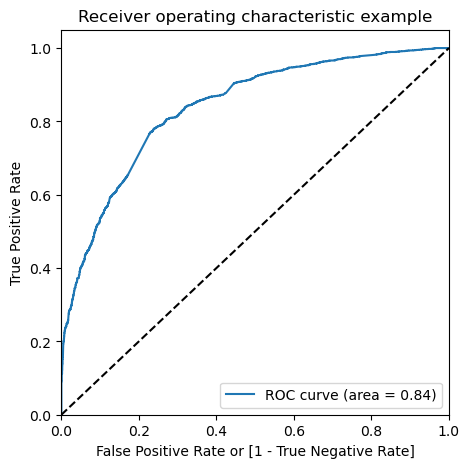

In [103]:
draw_roc(y_train_pred_final.Conv, y_train_pred_final.Conv_Prob)

### Step 10: Finding Optimal Cutoff Point

In [104]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Conv,Conv_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.216557,0,1,1,1,0,0,0,0,0,0,0
1,0,0.085391,0,1,0,0,0,0,0,0,0,0,0
2,1,0.045272,0,1,0,0,0,0,0,0,0,0,0
3,1,0.497892,0,1,1,1,1,1,0,0,0,0,0
4,1,0.497892,0,1,1,1,1,1,0,0,0,0,0


In [105]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Conv, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.550773  0.989297  0.143166
0.2   0.2  0.644698  0.956259  0.355104
0.3   0.3  0.715983  0.908795  0.536765
0.4   0.4  0.756333  0.829688  0.688149
0.5   0.5  0.744004  0.653327  0.828287
0.6   0.6  0.731899  0.572825  0.879758
0.7   0.7  0.705671  0.476501  0.918685
0.8   0.8  0.675633  0.370405  0.959343
0.9   0.9  0.624972  0.230805  0.991349


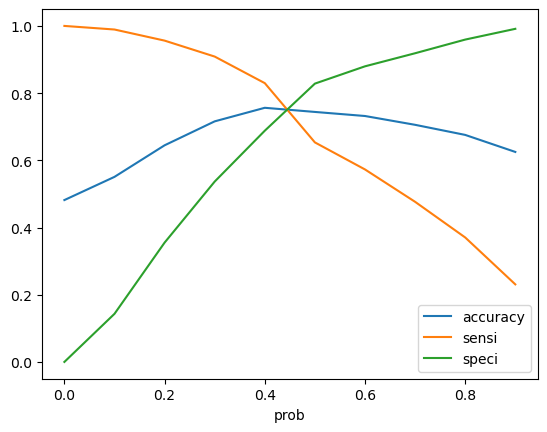

In [106]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.42 is the optimum point to take it as a cutoff probability.

In [107]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Conv,Conv_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.216557,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.085391,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.045272,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.497892,0,1,1,1,1,1,0,0,0,0,0,1
4,1,0.497892,0,1,1,1,1,1,0,0,0,0,0,1


In [108]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Conv, y_train_pred_final.final_predicted)

0.7556601658820892

In [109]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Conv, y_train_pred_final.final_predicted )
confusion2

array([[1625,  687],
       [ 403, 1746]], dtype=int64)

### Step 11: Making predictions on the test set

In [110]:
X_test[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]] = scaler.transform(X_test[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]])

In [111]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,...,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Rural and Agribusiness,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4771,0,0.000000,0.000000,0.0000,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6122,0,0.027888,0.029049,0.4375,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9202,0,0.015936,0.416813,0.2500,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6570,1,0.011952,0.378961,0.1875,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2668,0,0.031873,0.395246,0.2500,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [112]:
X_test_sm = sm.add_constant(X_test)

In [114]:
X_test_sm

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Reference,...,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Rural and Agribusiness,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4771,1.0,0,0.000000,0.000000,0.00000,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6122,1.0,0,0.027888,0.029049,0.43750,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
9202,1.0,0,0.015936,0.416813,0.25000,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6570,1.0,1,0.011952,0.378961,0.18750,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2668,1.0,0,0.031873,0.395246,0.25000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0,0.011952,0.027289,0.09375,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6583,1.0,0,0.011952,0.152289,0.18750,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5531,1.0,0,0.055777,0.702025,0.87500,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3056,1.0,1,0.011952,0.417694,0.18750,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [115]:
# Drop the required columns from X_test as well
X_test.drop(['Lead Origin_Lead Add Form','Lead Source_Reference', 'Last Notable Activity_Had a Phone Conversation',"What is your current occupation_Housewife",
"Lead Source_Olark Chat", "TotalVisits", "What is your current occupation_Working Professional", "Lead Origin_Landing Page Submission", "Specialization_Rural and Agribusiness","Specialization_Travel and Tourism","Specialization_E-Business",
"Specialization_IT Projects Management","Specialization_Operations Management","Specialization_E-COMMERCE","Specialization_Business Administration","Specialization_Supply Chain Management",
"Specialization_Human Resource Management","Specialization_Finance Management"], axis=1, inplace=True)

In [116]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [117]:
y_test_pred[:10]

4771    0.939089
6122    0.073302
9202    0.630757
6570    0.233630
2668    0.419316
4233    0.856824
3368    0.891184
9091    0.678718
5972    0.112832
3631    0.432417
dtype: float64

In [118]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [119]:
# Let's see the head
y_pred_1.head()

,0
4771,0.939089
6122,0.073302
9202,0.630757
6570,0.233630
2668,0.419316


In [120]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [121]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [122]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [123]:
y_pred_final.head()

,Converted,0
0,1,0.939089
1,0,0.073302
2,0,0.630757
3,1,0.233630
4,1,0.419316


In [125]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [127]:
y_pred_final.head()

,Converted,Conv_Prob
0,1,0.939089
1,0,0.073302
2,0,0.630757
3,1,0.233630
4,1,0.419316


In [129]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [130]:
y_pred_final.head()

,Converted,Conv_Prob,final_predicted
0,1,0.939089,1
1,0,0.073302,0
2,0,0.630757,1
3,1,0.233630,0
4,1,0.419316,0


In [133]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7484309623430963

In [134]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[696, 300],
       [181, 735]], dtype=int64)

In [135]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [136]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8024017467248908

In [137]:
# Let us calculate specificity
TN / float(TN+FP)

0.6987951807228916